__Data__: The iris data set. (See https://en.wikipedia.org/wiki/Iris_flower_data_set)

__Goal__: Correctly classify the species based on the sepal/petal length/width using the support vector machine method.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
# Import the data

iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

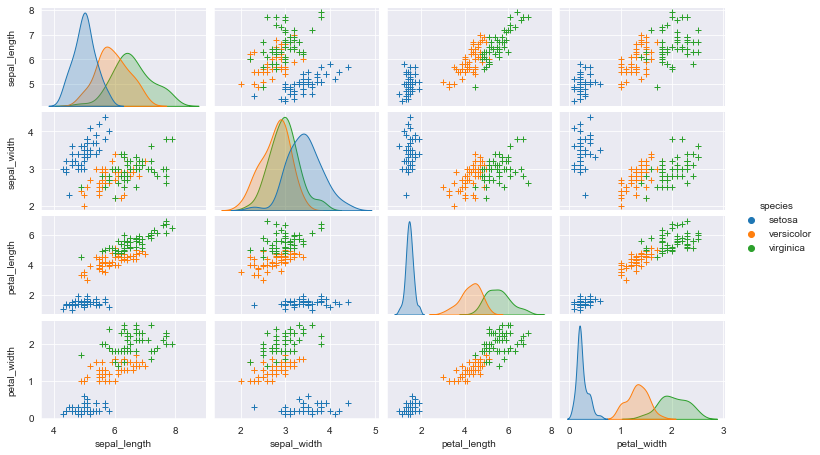

In [6]:
# Pairplot to check for correlations between features with category 'species'

sns.set_style("darkgrid")

g = sns.pairplot(iris, hue='species', height=1.6, aspect=1.6, plot_kws=dict(marker="+", linewidth=1))
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.15,0.5);

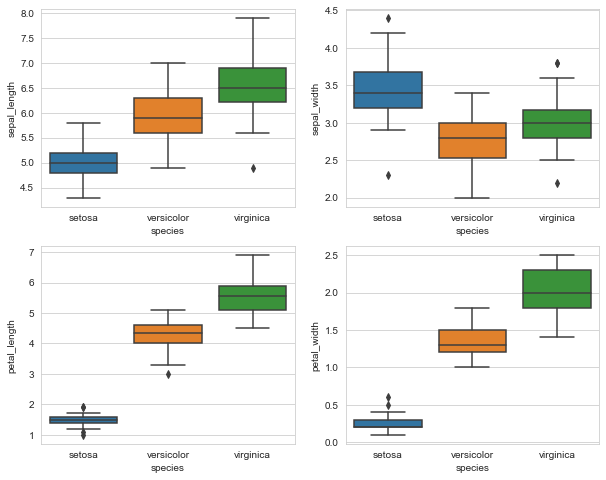

In [7]:
# Boxplots of the features with respect to species

sns.set_style("whitegrid")
features = iris.columns[:-1]

fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(wspace=0.2, hspace=0.2)
fig.align_ylabels()
fig.set_size_inches(10,8)

axes = axes.flatten()
for i in range(4):
    sns.boxplot(x="species", y=features[i], data=iris, ax=axes[i]);

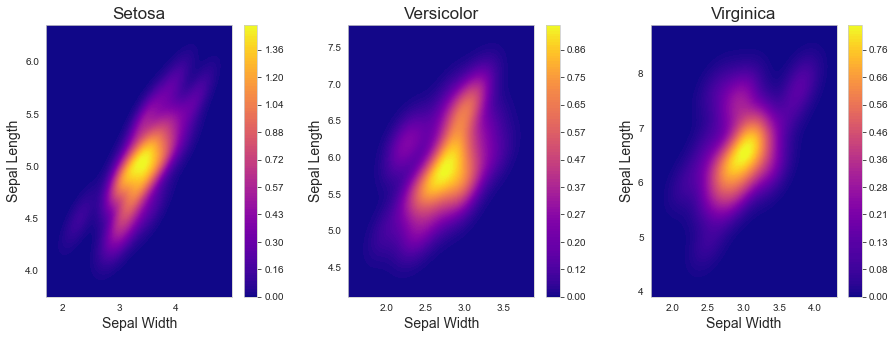

In [8]:
# KDE plots for sepal_width versus sepal_length for all species

species = list(iris.species.unique())

fig, axes = plt.subplots(1, 3)
fig.subplots_adjust(wspace=0.3, hspace=0.2)
fig.set_size_inches(15,5)

for i in range(3):
    sns.kdeplot(data=iris[iris['species']==species[i]], x="sepal_width", y="sepal_length", ax=axes[i],
    fill=True, thresh=0,  levels=100, cmap="plasma", cbar=True, cbar_kws={'format':'%.2f'})
    axes[i].set_xlabel('Sepal Width',fontsize=14)
    axes[i].set_ylabel('Sepal Length',fontsize=14)
    axes[i].set_title('{}'.format(str.title(species[i])), size=17);

### Support Vector Machine Model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = iris.drop('species',axis=1) # predictors
y = iris['species'] # target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [12]:
from sklearn.svm import SVC

# docs: https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [13]:
model = SVC() # Instantiate a support vector classifier; default kernel is 'rbf'

# docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
model.fit(X_train,y_train) # fit svc model

SVC()

### Predictions and Evaluation

In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print("Confusion Matrix:")
print("")
print(confusion_matrix(y_test,predictions))

Confusion Matrix:

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [18]:
print("Classification Report:")
print("")
print(classification_report(y_test, predictions))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Visualizing the SVM Classifier with Hyperplane boundries

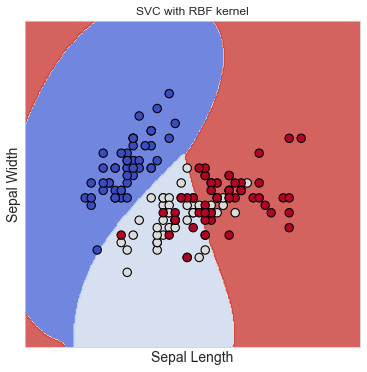

In [28]:
# This code allows us to visualize the SVM classifier for at least two of the features. 
# Here is shown the svm classifier using the default kernel, i.e., radial basis function kernel.
# Code source: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. 
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(6,6))
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=70, linewidths=1.1)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with RBF kernel')

plt.show()

### GridSearch for Hyperparameter Tuning

In [19]:
# Now we will do a GridSearch in order to tune the parameters to improve the scores
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/grid_search.html#grid-search

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [25]:
grid_predictions = grid.predict(X_test)

In [26]:
print("Confusion Matrix:")
print("")
print(confusion_matrix(y_test,grid_predictions))

Confusion Matrix:

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [27]:
print("Classification Report:")
print("")
print(classification_report(y_test,grid_predictions))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



__Conclusion__: the overall classification results are really good, with GridSearch hyperparameter tuning having no effect on improving the results. 